In [1]:
# 导入包、数据及标准化
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN # 密度聚类模块
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 实际标签
feature_names = iris.feature_names
target_names = iris.target_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# 标准化数据


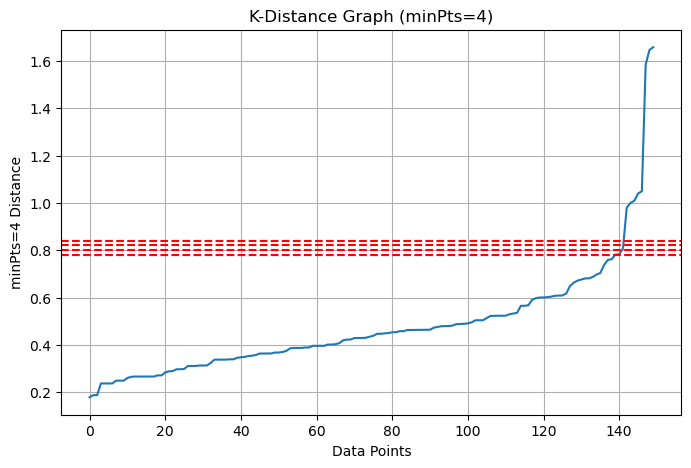

In [26]:
# 绘制 K-Distance图，拐点的y是eps
from sklearn.neighbors import NearestNeighbors
# 根据经验有三类，(k = minPts-1)
minPts = 4

# 计算每个点到其第k个最近邻的距离 
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
#排序
k_distances = np.sort(distances[:, minPts-1], axis=0)

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title('K-Distance Graph (minPts={})'.format(minPts))
plt.xlabel('Data Points')
plt.ylabel('minPts={} Distance'.format(minPts))
plt.axhline(y=0.78, color='r', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.axhline(y=0.82, color='r', linestyle='--')
plt.axhline(y=0.84, color='r', linestyle='--')
plt.grid()
plt.show()

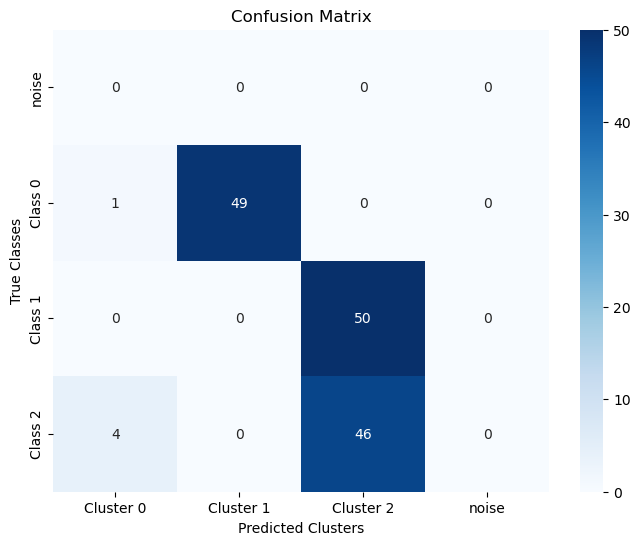

In [32]:
# 训练，minPts最小邻居样本数minSamples
dbscan = DBSCAN(eps=0.78, min_samples=4)
y_dbscan = dbscan.fit_predict(X_scaled)

# 评价
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y,y_dbscan)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2','noise'],
            yticklabels=['noise','Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Classes')
plt.show()